## DNN을 이용한 Eye diagram 예측방법
LHS를 이용하여 변수를 정한후 정한 변수로 뽑은 데이터를 이용하여 DNN을 실행한다.  
가장 기본적인 tensorflow DNN코드이다.  
실행하기위해 필요한 library들을 import시켜준다.
step3 부터 step 10까지 작성해주시면 됩니다.

In [1]:
import tensorflow as tf
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

/mnt/home/skhynix/.conda/envs/SK_week5/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/mnt/home/skhynix/.conda/envs/SK_week5/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


W0730 17:11:41.095506 140239577442048 font_manager.py:1282] findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
W0730 17:11:41.104413 140239577442048 font_manager.py:1282] findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


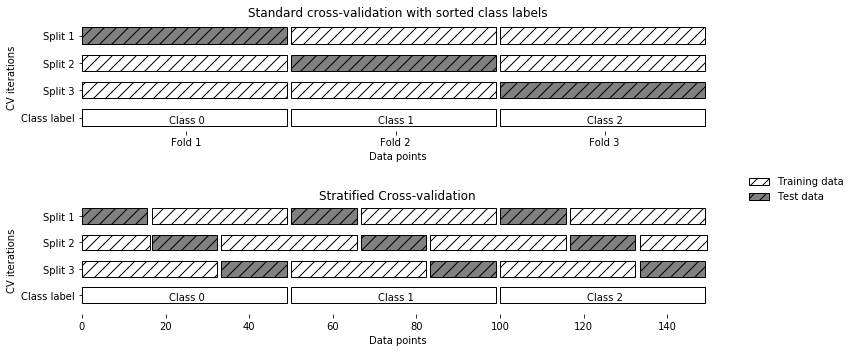

In [2]:
# step0 :  Cross validation 설명 
plt.rc('font', family='AppleGothic') # 한글출력
plt.rcParams['axes.unicode_minus']=False # 축 -
mglearn.plots.plot_stratified_cross_validation()
plt.show()

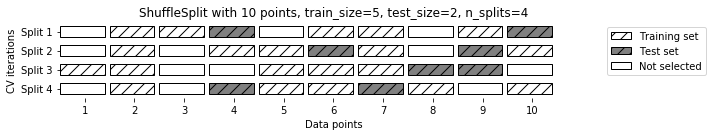

In [3]:
mglearn.plots.plot_shuffle_split()
plt.show()

### step1
변수를 정해준다. 최대 iteration 수, 첫layer의 hidden neuron의 수, 두번째 layer의 hidden neuron의 수

In [4]:
NUM_ITER =40000  # Number of iterations
nh = 10  # Number of hidden neurons
nh1 = 5
learning_rate = 1e-4  # Initial learning rate for gradient descent algorithm

### step2
입력과 출력 데이터를 가져온다.

In [5]:
x_data_temp=np.loadtxt('./DNN_data/x_data.csv',delimiter=',',unpack=True, dtype='float32')
x_data=np.transpose(x_data_temp)

y_data_temp=np.loadtxt('./DNN_data/y_data.csv',delimiter=',',unpack=True, dtype='float32')
y_data=np.transpose(y_data_temp)

### step3
tensorflow의 DNN을 구성하는 각 layer의 weight와 bias 변수를 지정하여준다.  
2개의 hidden layer
입력의 수는 5개(width, space, thickness, height_dielectric ,height_passivation)
tf.get_variable 함수이용. xavier_initializer 사용.

In [6]:
x_data.shape, y_data.shape

((300, 5), (300, 2))

In [7]:
W1 = tf.get_variable('W1',shape=[5,nh],initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([nh]))
W2 = tf.get_variable('W2',shape=[nh,nh1],initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([nh1]))
Wo = tf.get_variable('Wo',shape=[nh1,2],initializer=tf.contrib.layers.xavier_initializer())
bo = tf.Variable(tf.random_normal([2]))

W0730 17:11:42.352248 140239577442048 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [8]:
# tf.reset_default_graph() 

### step4
입력과 출력데이터를 train,validation,test로 각각 나누어준다.  
x_train, x_test, y_train, y_test 8:2의 비율로  
train_test_split 함수사용.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.2, random_state=0)

In [10]:
len(y_data),len(y_train),len(y_test),len(x_data),len(X_train),len(X_test)

(300, 240, 60, 300, 240, 60)

### step5
placeholder함수를 이용하여 x_,y_ 정의한다.

In [11]:
x_ = tf.placeholder(tf.float32, [None, 5])
y_ = tf.placeholder(tf.float32, [None, 2])

### step6
각각의 layer에 Activation function 설정(DNN구성)  
원하는 activation function으로 설정. 

In [12]:
h = tf.math.tanh(tf.matmul(x_, W1) + b1)
h1 = tf.math.tanh(tf.matmul(h, W2) + b2)

y_hat = tf.matmul(h1, Wo) + bo

### step7
cross_entropy 를 MSE 방법으로 설정하고  
train_step Adamoptimizer 이용하여 cross_entropy를 작게하는방향으로 설정한다.

In [13]:
cross_entropy = tf.reduce_mean((y_-y_hat)**2)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

W0730 17:11:42.977898 140239577442048 deprecation.py:323] From /mnt/home/skhynix/.conda/envs/SK_week5/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### step 8
정확도를 확인하기위해서 regression의 accuracy 를 설정해준다.  
Percent error를 확인하기위한 accuracy_per도 같이 설정해준다.

In [14]:
accuracy = tf.reduce_mean(tf.abs(y_-y_hat))
accuracy_per = tf.reduce_mean(tf.abs(y_-y_hat)/y_*100)

### step 9 
run_train 을 정의하여 훈련하는곳에 사용한다.  
session을 변수들을 초기화하며 시작한다.  
for문을 이용하여서 NUM_ITER 만큼 위에서 설정해놓은 train_step함수를 이용하여 train_x와 train_y값을 넣어주어서 훈련시킨다.  
1000번의 iteration마다 정확도를 출력하여준다.  
원하는 조건을 만족하면 train_accuracy <0.005 빠져나가도록 설정한다. 

In [15]:
def run_train(session, train_x, train_y):
    print("\nStart training")
    session.run(tf.global_variables_initializer()) #tf.initialize_all_variables()
    for i in range(NUM_ITER):
        train_step.run(feed_dict={x_: np.array(train_x), y_: np.array(train_y)})  # data와 y_train을 넣어 훈련
        if i % 1000 == 999:
            train_accuracy = accuracy.eval(feed_dict={x_: np.array(train_x), y_: train_y})
            print("|%d\t|%.4f\t|" % (i + 1, train_accuracy))  # 정확도 값을 출력해준다.
            
            # 원하는조건을 만족하면 for문 빠져나가도록 설정
            if train_accuracy < 0.005 :
                break;    

### step 10
cross_validate 을 정의하여 crossvalidtaion 하는데 사용함.  
kFold 라는 함수를 이용하여 cross validation 하는데 적용한다.  
split하는 숫자동안 for문을 이용하여 train과 validation 으로 데이터를 나누어 실행시킨다.  
실행시키기위해 run_train 함수를 넣어준다.  
results를 출력으로 출력해주기위해 이함수에 각 cross_validation마다 accuracy의 결과를 저장해준다.

In [16]:
def cross_validate(session, split_size):
    results = []
    kf = KFold(n_splits=split_size)
    for train_idx, val_idx in kf.split(X_train, y_train):
        train_x = X_train[train_idx]
        train_y = y_train[train_idx]
        val_x = X_train[val_idx]
        val_y = y_train[val_idx]
        run_train(session, train_x, train_y)
        results.append(session.run(accuracy, feed_dict={x_: val_x, y_: val_y}))
    return results

### step 11
session을이용하여 crossvalidation을 이용하여 훈련실행


Start training
|1000	|0.2533	|
|2000	|0.0978	|
|3000	|0.0870	|
|4000	|0.0815	|
|5000	|0.0758	|
|6000	|0.0640	|
|7000	|0.0526	|
|8000	|0.0435	|
|9000	|0.0348	|
|10000	|0.0293	|
|11000	|0.0254	|
|12000	|0.0217	|
|13000	|0.0184	|
|14000	|0.0154	|
|15000	|0.0133	|
|16000	|0.0119	|
|17000	|0.0109	|
|18000	|0.0098	|
|19000	|0.0088	|
|20000	|0.0081	|
|21000	|0.0075	|
|22000	|0.0068	|
|23000	|0.0063	|
|24000	|0.0059	|
|25000	|0.0056	|
|26000	|0.0054	|
|27000	|0.0052	|
|28000	|0.0051	|
|29000	|0.0050	|

Start training
|1000	|0.9985	|
|2000	|0.3812	|
|3000	|0.1438	|
|4000	|0.0666	|
|5000	|0.0523	|
|6000	|0.0478	|
|7000	|0.0421	|
|8000	|0.0359	|
|9000	|0.0309	|
|10000	|0.0280	|
|11000	|0.0252	|
|12000	|0.0222	|
|13000	|0.0197	|
|14000	|0.0178	|
|15000	|0.0163	|
|16000	|0.0149	|
|17000	|0.0136	|
|18000	|0.0122	|
|19000	|0.0107	|
|20000	|0.0096	|
|21000	|0.0086	|
|22000	|0.0076	|
|23000	|0.0068	|
|24000	|0.0062	|
|25000	|0.0059	|
|26000	|0.0056	|
|27000	|0.0053	|
|28000	|0.0051	|
|29000	|0.0049	|


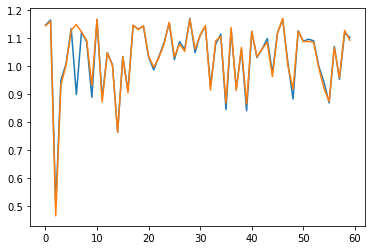

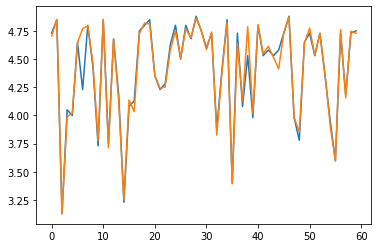

In [17]:
with tf.Session() as session: 
    result = cross_validate(session,5)
    print ("Cross-validation result: %s" % result)
    print ("Test accuracy: %f" % session.run(accuracy, feed_dict={x_: X_test, y_: y_test}))
    print ("TEST accuracy percent : %f" % session.run(accuracy_per, feed_dict={x_: X_test, y_: y_test}))
    
    deploy_ytest = session.run(y_hat, feed_dict={x_: X_test})

    saver = tf.train.Saver()
    saver.save(session, './Hynix_weight.ckpt')
    
    dataframe = pd.DataFrame(deploy_ytest)
    dataframe.to_csv("./deploy_ytest.csv",header=False,index=False)
    dataframe = pd.DataFrame(y_test)
    dataframe.to_csv("./y_test.csv",header=False,index=False)
    
    plt.figure(2)
    plt.plot(y_test[:,0])
    plt.plot(deploy_ytest[:,0])
    
    plt.figure(3)
    plt.plot(y_test[:,1]*5)
    plt.plot(deploy_ytest[:,1]*5)